# Recommender System

**Welcome to the notebook on recommender systems. This recommender is built <br> movie lens dataset. We are trying to use collaborative filtering technique**

Recommender Systems
1. Collaborative Filtering - It is between users (User-Item Matrix, Correlation)
2. Content Based Filtering - Attributes of User (Age, Gender, Dept)

# Import libraries

In [1]:
import numpy as np
import pandas as pd

1. User id
2. item id
3. rating
4. timestamp

In [2]:
column_names=["user_id","item_id","rating","timestamp"]
df=pd.read_csv('u.data',sep='\t',names= column_names)

In [3]:
df

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [4]:
movie_titles=pd.read_csv("Movie_Id_Titles")

In [5]:
movie_titles.head(15)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6,7,Twelve Monkeys (1995)
7,8,Babe (1995)
8,9,Dead Man Walking (1995)
9,10,Richard III (1995)


In [6]:
df=pd.merge(df,movie_titles,on='item_id')

In [7]:
df.head(150)

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
145,239,50,5,889179131,Star Wars (1977)
146,221,50,4,875244125,Star Wars (1977)
147,215,50,5,891436543,Star Wars (1977)
148,194,50,3,879521396,Star Wars (1977)


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

# EDA -1 : Find out the average (mean) rating for each movie

In [9]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head(20)

title
They Made Me a Criminal (1939)                            5.000000
Marlene Dietrich: Shadow and Light (1996)                 5.000000
Saint of Fort Washington, The (1993)                      5.000000
Someone Else's America (1995)                             5.000000
Star Kid (1997)                                           5.000000
Great Day in Harlem, A (1994)                             5.000000
Aiqing wansui (1994)                                      5.000000
Santa with Muscles (1996)                                 5.000000
Prefontaine (1997)                                        5.000000
Entertaining Angels: The Dorothy Day Story (1996)         5.000000
Pather Panchali (1955)                                    4.625000
Some Mother's Son (1996)                                  4.500000
Maya Lin: A Strong Clear Vision (1994)                    4.500000
Anna (1996)                                               4.500000
Everest (1998)                                          

In [10]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Star Wars (1977)                 584
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

In [11]:
ratings=pd.DataFrame(df.groupby('title')['rating'].mean())

In [12]:
ratings

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [13]:
ratings['num of ratings']=pd.DataFrame(df.groupby('title')['rating'].count())

In [14]:
ratings.head(50)

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
2 Days in the Valley (1996),3.225806,93
"20,000 Leagues Under the Sea (1954)",3.500000,72
2001: A Space Odyssey (1968),3.969112,259
3 Ninjas: High Noon At Mega Mountain (1998),1.000000,5


<AxesSubplot:>

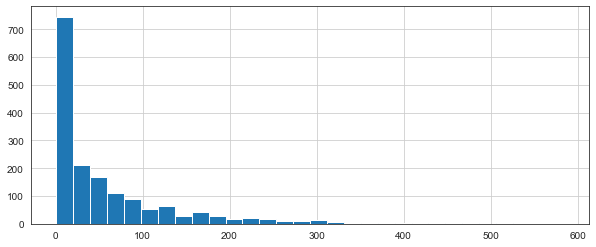

In [15]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=30)

<AxesSubplot:>

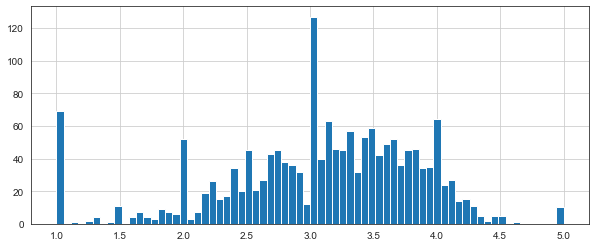

In [16]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

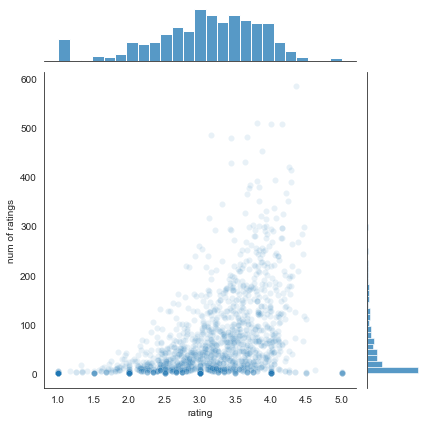

In [17]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.1)

# User Item Matrix

In user item matrix
Columns - Items (Bahubali, Vikram, Kadal, KGF-2)
Rows - Users (Keshav,Rishab, Fareetha, Prarthana)

In [18]:
movie_mat=df.pivot_table(index='user_id',columns='title',values='rating')

In [19]:
movie_mat.head(5)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
ratings

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [21]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [22]:
starwars_user_ratings=movie_mat['Star Wars (1977)']

In [23]:
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [24]:
liarliar_user_ratings=movie_mat['Liar Liar (1997)']

In [25]:
liarliar_user_ratings

user_id
0      NaN
1      NaN
2      1.0
3      2.0
4      5.0
      ... 
939    NaN
940    4.0
941    4.0
942    NaN
943    NaN
Name: Liar Liar (1997), Length: 944, dtype: float64

corrwith - Correlation with what?

Users correlated with what..Star wars correlated with what

In [26]:
similar_to_starwars=movie_mat.corrwith(starwars_user_ratings)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [27]:
similar_to_Liar_Liar=movie_mat.corrwith(liarliar_user_ratings)

In [28]:
similar_to_Liar_Liar

title
'Til There Was You (1997)                0.118913
1-900 (1994)                                  NaN
101 Dalmatians (1996)                    0.469765
12 Angry Men (1957)                      0.066272
187 (1997)                               0.175145
                                           ...   
Young Guns II (1990)                     0.352174
Young Poisoner's Handbook, The (1995)    0.445016
Zeus and Roxanne (1997)                 -0.500000
unknown                                  0.870388
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [29]:
corr_with_starwars=pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_with_starwars.dropna(inplace=True)
corr_with_starwars.head(50)

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
"39 Steps, The (1935)",0.106453


In [30]:
corr_with_starwars.sort_values('Correlation',ascending=False).head(50)

,Correlation
title,
Hollow Reed (1996),1.000000
Commandments (1997),1.000000
Cosi (1996),1.000000
No Escape (1994),1.000000
Stripes (1981),1.000000
Star Wars (1977),1.000000
Man of the Year (1995),1.000000
"Beans of Egypt, Maine, The (1994)",1.000000
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.000000


If Correlation close to 1 --> Data Highly correlated
If Correlation close to -1 --> Data higly not correlated
If close to 0 --> Cant be used for analysis

In [31]:
ratings

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [32]:
corr_with_starwars=corr_with_starwars.join(ratings['num of ratings'])

In [33]:
corr_with_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [34]:
corr_with_starwars[corr_with_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
